<a href="https://colab.research.google.com/github/jwoodz0188/Homework/blob/main/Homework5_jGomez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. (50%) 15.18 (Project: Determine k in k-Means Clustering) on page 661.  Use elbow method to determine optimal k (the number of classes) for k-Means Clustering on iris dataset only. iris dataset can be loaded from sklearn.

Produce the following image:

In [3]:
# load scikit-learn from raw url in githu
url = 'https://raw.githubusercontent.com/scikit-learn/scikit-learn/7f9bad99d6e0a3e8ddf92a7e5561245224dab102/sklearn/datasets/_base.py'

In [4]:
# import needed libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn import datasets

In [5]:
# import warnings filter

from warnings import simplefilter

# ignore all future warnings

simplefilter(action='ignore', category=FutureWarning)

In [6]:
#1.15.18 load the iris database

iris= load_iris()
X = iris['data']
K = range(1,11)
print(K)

range(1, 11)


In [7]:
#Elbow Method to find the optimal K value

wcss = []
for i in range(1, 11):
   clustering = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
   clustering.fit(X)
   wcss.append(clustering.inertia_)


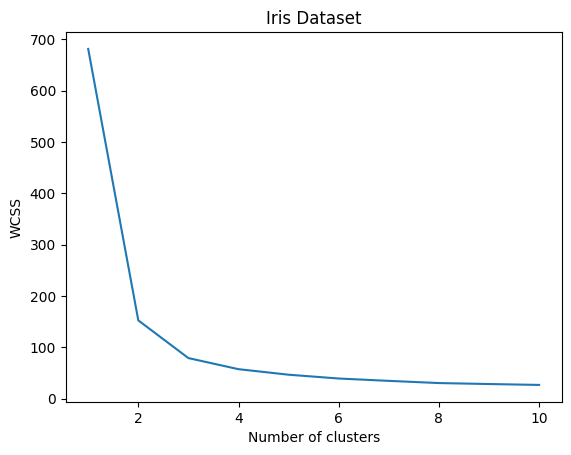

In [8]:
# Elbow Graph

plt.title('Iris Dataset')
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

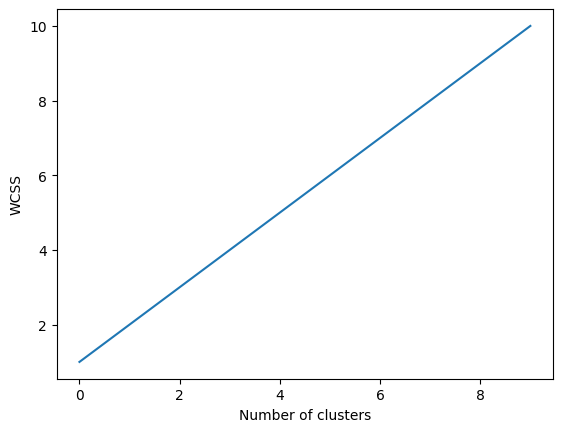

In [10]:
#Training the K-Means model

wcss.append(clustering.inertia_)
clustering = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
clustering.fit(X)
plt.plot(range(1, 11))
plt.xlabel('Number of clusters')

y_clustering = clustering.fit_predict(X)

plt.ylabel('WCSS')
plt.show()



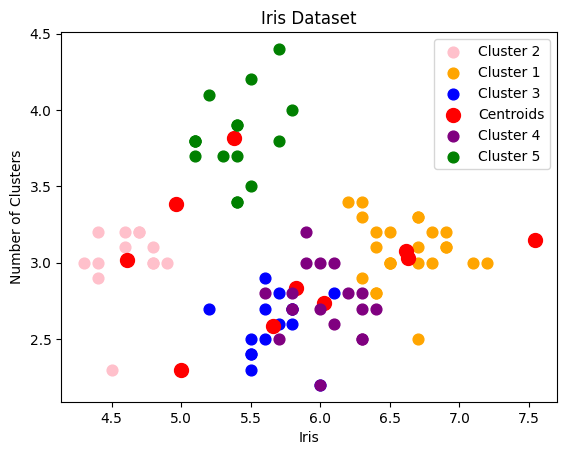

In [11]:
# The clusters

plt.scatter( X[y_clustering == 1, 0], X[y_clustering == 1, 1], s = 60, c = 'pink', label = 'Cluster 2')
plt.scatter( X[y_clustering == 0, 0], X[y_clustering == 0, 1], s = 60, c = 'orange', label = 'Cluster 1')
plt.scatter( X[y_clustering == 2, 0], X[y_clustering == 2, 1], s = 60, c = 'blue', label = 'Cluster 3')
plt.scatter( clustering.cluster_centers_[:, 0], clustering.cluster_centers_[:, 1], s = 100, c = 'red',
            label = 'Centroids')
plt.scatter( X[y_clustering == 3, 0], X[y_clustering == 3, 1], s = 60, c = 'purple', label = 'Cluster 4')
plt.scatter( X[y_clustering == 4, 0], X[y_clustering == 4, 1], s = 60, c = 'green', label = 'Cluster 5')

plt.title('Iris Dataset')
plt.xlabel('Iris')
plt.ylabel('Number of Clusters')
plt.legend()
plt.show()

2. (50%) Get MNIST dataset as the instructions in 15.21. Use PCA dimensional reduction for logistic regression on MNIST to show how much PCA can help to speed up logistic regression.  For example, show the time difference and accuracy score values before and after applying PCA dimensional reduction.


In [12]:
# load scikit-learn from raw url in githu
url = 'https://raw.githubusercontent.com/scikit-learn/scikit-learn/7f9bad99d6e0a3e8ddf92a7e5561245224dab102/sklearn/datasets/_base.py'

In [50]:
# import needed libaries

import numpy as np
from numpy.core.multiarray import min_scalar_type
import pandas as pd
from pandas.core.series import missing
import matplotlib.pyplot as plot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

In [14]:
# load data:

minst = fetch_openml("mnist_784")
X= minst.data
y = minst.target

In [15]:
#Then split data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [57]:
#apply  StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
#apply PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [61]:
#apply logistic regression:

logisticRegr = LogisticRegression(solver='lbfgs', max_iter=2500)
logisticRegr.fit(X_train_pca, y_train)



LogisticRegression(max_iter=2500)

In [65]:
#get the accuracy score.

y_pred = logisticRegr.predict(X_test_pca)
y_true = y_test
print("Train accuracy:", np.round(accuracy_score(y_train, logisticRegr.predict(X_train_pca)), 2)*100)
print("Test accuracy:", np.round(accuracy_score(y_true,y_pred), 2)*100)

Train accuracy: 94.0
Test accuracy: 92.0


In [73]:
#Compare time: without PCA.

import time
start_time_without_pca = time.time()
logisticRegr.fit(X_train_scaled, y_train)
end_time_without_pca = time.time()

time_without_pca = end_time_without_pca - start_time_without_pca

 # with PCA
start_time_with_pca = time.time()
logisticRegr.fit(X_train_pca, y_train)
end_time_with_pca = time.time()

time_with_pca = end_time_with_pca - start_time_with_pca

print(np.round(time_without_pca/60)," minutes without PCA")
print(np.round(time_with_pca/60)," minutes with PCA")
print("With PCA it is:", np.round((time_without_pca - time_with_pca)/60)," minutes faster.")

6.0  minutes without PCA
2.0  minutes with PCA
With PCA it is: 4.0  minutes faster.
